# Acquire data

First we will download packages we need to run our code.

In [4]:
import pandas as pd
import seaborn as sns
from pydataset import data
from acquire import get_titanic_data, get_iris_data

### 1. Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [7]:
df_iris = data('iris')
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


**Print the first 3 rows.**

In [9]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


**Print the number of rows and columns (shape).**

In [11]:
df_iris.shape

(150, 5)

**Print the column names.**

In [14]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

**Print the data type of each column.**

In [15]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

**Print the summary statistics for each of the numeric variables.**

In [16]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Would you recommend rescaling the data based on these statistics?**

We should likely rescale because the magnitude of some of the measurements differs significantly. For example, the minimum petal width is 0.1, whereas the maximum sepal length is 7.9.

### 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [47]:
df_excel= pd.read_excel (r'/Users/malachihale/Downloads/Untitled spreadsheet.xlsx')
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,NaN,NaN


In [54]:
df_excel = df_excel.drop(columns = ["Unnamed: 12", "Unnamed: 13"])

**Assign the first 100 rows to a new dataframe, df_excel_sample**

In [55]:
df_excel_sample = df_excel.head(100)

**Print the number of rows of your original dataframe.**

In [56]:
df_excel.shape[1]

12

**Print the first 5 column names.**

In [57]:
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

**Print the column names that have a data type of object.**

In [58]:
objects = df_excel.dtypes == object
df_excel.columns[objects]

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

**Compute the range for each of the numeric variables.**

In [59]:
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

All of our values are either numeric of objects, so we can use that to isolate just the numeric values.

In [64]:
numeric = df_excel.dtypes != object
maximums = df_excel.max()[numeric] 
minimums = df_excel.min()[numeric]
maximums - minimums

is_senior_citizen         1
phone_service             2
internet_service          2
contract_type             2
monthly_charges       100.5
total_charges        8666.0
dtype: object

### 3. Read date from the google sheet linked in the textbook into a dataframe.

In [67]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Print the first three rows.**

In [68]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Print the number of rows and columns.**

In [69]:
df_google.shape

(891, 12)

**Print the column names**

In [70]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Print the datatype of each column.**

In [71]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Print the summary statistics for each of the numeric variables**

In [83]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Print the unique values for each of your categorical variables.**

In [91]:
df_google.Survived.unique()

array([0, 1])

In [93]:
df_google.Sex.unique()

array(['male', 'female'], dtype=object)

In [96]:
df_google.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Data Preparation

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

#### Use the function defined in acquire.py to load the iris dataset.

In [30]:
df = acquire.get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


#### Drop the species_id and measurement_id columns.

In [31]:
df = df.drop(columns='species_id')
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


#### Rename the species_name column to just species.

In [35]:
df = df.rename(columns={"species_name": "species"})
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [40]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

There are three unique species in the dataframe.

#### Create dummy variables of the species name.

In [36]:
df_dummy = pd.get_dummies(df[['species']], dummy_na=False, drop_first = True)
df_dummy.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Now we'll append the dummy values to the dataframe.

In [41]:
df = pd.concat([df, df_dummy], axis = 1)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


#### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [55]:
def clean_data(df):
    df.drop_duplicates(inplace=True)
    df.drop(columns=['species_id'], inplace=True)
    df = df.rename(columns={"species_name": "species"})
    dummy_df = pd.get_dummies(df[['species']], drop_first=True)
    return pd.concat([df, dummy_df], axis=1)

In [56]:
def prep_iris(df):
    df = clean_data(df)
    return df

In [58]:
df = acquire.get_iris_data()
df = prep_iris(df)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


# Exploratory Analysis

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

from acquire import get_titanic_data, get_iris_data
from prepare import prep_iris

import seaborn as sns
from sklearn.model_selection import train_test_split

## Section 1 - iris_db

### Acquire, prepare, and split your data.

**Acquire**

In [28]:
df = acquire.get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


**Prepare**

In [29]:
df = prepare.prep_iris(df)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


**Split**

In [34]:
def train_validate_test_split(df, target, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.8, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [35]:
train, validate, test = train_validate_test_split(df, target='species_versicolor')
train.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
56,versicolor,6.3,3.3,4.7,1.6,1,0
3,setosa,4.6,3.1,1.5,0.2,0,0


In [36]:
print(train.shape, validate.shape, test.shape)

(23, 7) (96, 7) (30, 7)


### Univariate Stats

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             149 non-null    object 
 1   sepal_length        149 non-null    float64
 2   sepal_width         149 non-null    float64
 3   petal_length        149 non-null    float64
 4   petal_width         149 non-null    float64
 5   species_versicolor  149 non-null    uint8  
 6   species_virginica   149 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 7.3+ KB


We will define categorical and quantitative variable. 

In [44]:
cat_vars = ['species', 'species_versicolor', 'species_virginica']

In [39]:
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

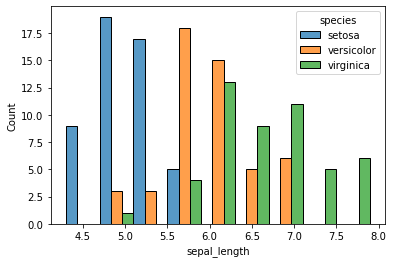

In [80]:
sepal_length = sns.histplot(data=df, x="sepal_length", hue="species", multiple="dodge")

SyntaxError: invalid syntax (<ipython-input-92-8fc04cadd676>, line 1)

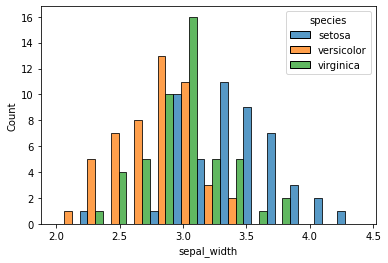

In [81]:
sepal_width = sns.histplot(data=df, x="sepal_width", hue="species", multiple = 'dodge')

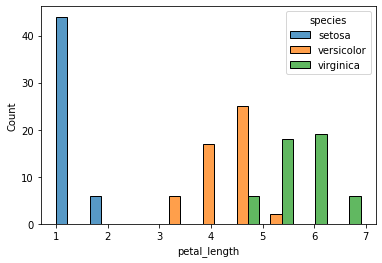

In [82]:
sepal_length = sns.histplot(data=df, x="petal_length", hue="species", multiple="dodge")

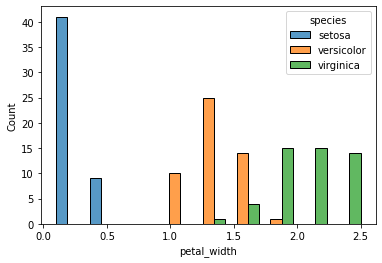

In [83]:
sepal_length = sns.histplot(data=df, x="petal_width", hue="species", multiple="dodge")